In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import shuffle

In [39]:
all_df = pd.read_csv('breast-cancer.csv', index_col=False)
all_df = shuffle(all_df)
features = all_df.drop('Irradiant', axis=1)
target = all_df['Irradiant']

<AxesSubplot:xlabel='Irradiant', ylabel='count'>

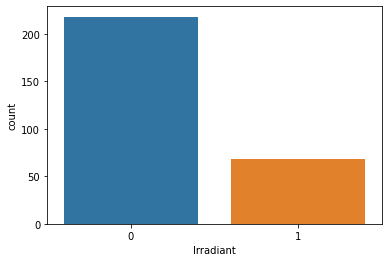

In [40]:
sns.countplot(x="Irradiant", data=all_df)

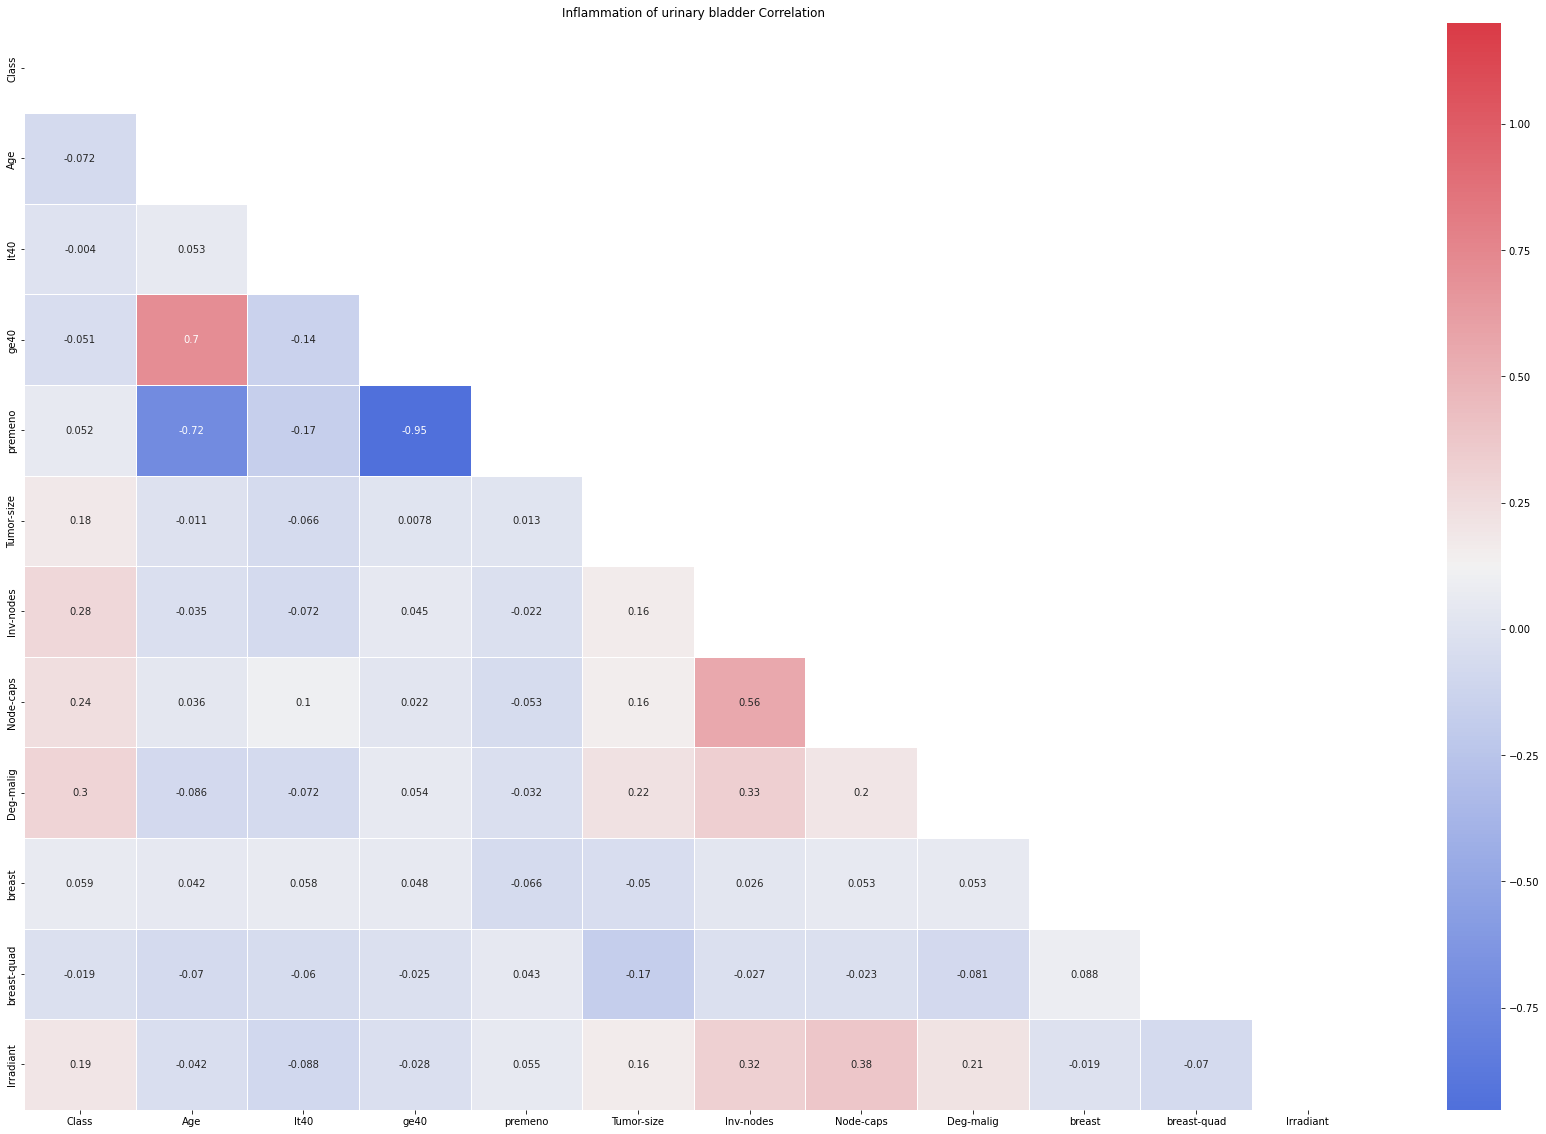

In [41]:
corrMatt = all_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 20))
plt.title('Inflammation of urinary bladder Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=0.5);

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, all_df['Irradiant'], test_size=0.3, random_state=1, stratify=all_df['Irradiant'])

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold

clf = LogisticRegression(max_iter = 1000)
cv_error = np.average(cross_val_score(clf, features, target, scoring='accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.79


# SVM

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svm = SVC(kernel="rbf", gamma='auto')

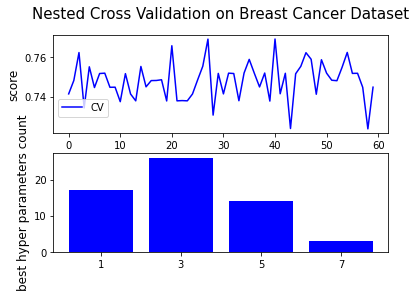

In [50]:
NUM_TRIALS = 60
X = features
y = target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 3, 5, 7]}

scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv)
    clf.fit(X,y)
    scores[i] = clf.best_score_
    params.append(clf.best_params_)


best_hyper_params_count = np.zeros(4)
for i in params:
    if params.count(i) >= 1:
        best_hyper_params_count[int((i["C"]-1)/2)] = params.count(i)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Nested Cross Validation on Breast Cancer Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.subplot(212)

plt.bar(range(len(best_hyper_params_count)), best_hyper_params_count,fc='b', tick_label=[1,3,5,7])
plt.ylabel("best hyper parameters count", fontsize="12")
plt.show()

In [52]:
svm = SVC(C=3.0, kernel="rbf", gamma='auto', degree=3)
cv_error_array = cross_val_score(svm, features, target, scoring='accuracy')
highest = np.max(cv_error_array)
average = np.average(cv_error_array)
lowest = np.min(cv_error_array)
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, average))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, highest))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, lowest))

The 5-fold cross-validation accuracy score for this classifier is 0.75
The 5-fold cross-validation accuracy score for this classifier is 0.79
The 5-fold cross-validation accuracy score for this classifier is 0.71


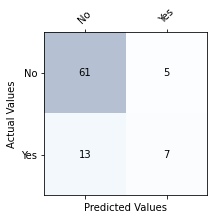

In [55]:
svm = SVC(C=3.0, kernel="rbf", gamma='auto', degree=3)
pred = svm.fit(x_train,y_train).predict(x_test)
cm = confusion_matrix(y_test, pred)
# Plot confusion matrix,
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
         ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
classes=["No","Yes"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

In [58]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

cv_error = np.average(cross_val_score(clf, features, target))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(5, cv_error))


The 5-fold cross-validation accuracy score for this classifier is 0.68


In [127]:
NUM_TRIALS = 150
X = features
y = target

# Set up possible values of parameters to optimize over
p_grid = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split':[5, 10, 15]}

scores = np.zeros(NUM_TRIALS)
params = []

for i in range(NUM_TRIALS):

    cv = KFold(n_splits=5, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=tree_clf, param_grid=p_grid, cv=cv)
    clf.fit(X,y)
    scores[i] = clf.best_score_
    params.append(clf.best_params_)

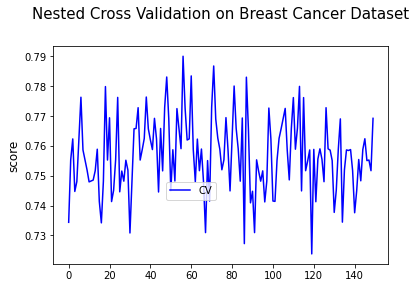

In [128]:
best_hyper_params_count = [[0 for i in range(5)] for j in range(3)]
for i in params:
    best_hyper_params_count[int(i['min_samples_split']/5-1)][int((i['max_depth']-3)/2)] = params.count(i)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
(line,) = plt.plot(scores, color="b")
plt.ylabel("score", fontsize="12")
plt.legend(
    [line],
    ["CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Nested Cross Validation on Breast Cancer Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.show()


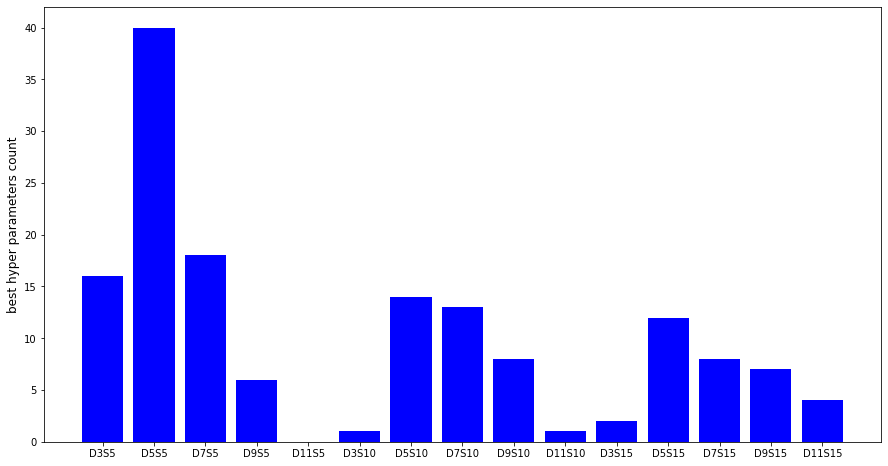

In [129]:
plt.figure(figsize = (15,8))

whole_list = best_hyper_params_count[0] + best_hyper_params_count[1] + best_hyper_params_count[2]

lang = []

for j in range(5,20,5):
    for i in range(3,13,2):
        lang.append('D' + str(i) + 'S' + str(j))       

plt.bar(range(len(whole_list)), whole_list, fc='b', tick_label=lang)

plt.ylabel("best hyper parameters count", fontsize="12")

plt.show()